In [1]:
from pycaret.classification import *
import numpy as np
import pandas as pd
import tensorflow as tf

column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
                "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
                "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
                "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
                "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
                "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label", "difficulty_level"]
path = 'C:\\Users\\Jovana\\PycharmProjects\\neural_network_DNN\\include\\KDDTrain+.txt'
path2= 'C:\\Users\\Jovana\\PycharmProjects\\neural_network_DNN\\include\\KDDTest+.txt'

ds_train=pd.read_csv(path,header=None, names = column_names)
ds_test=pd.read_csv(path2, header=None, names = column_names)

In [2]:
ds_train.label

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, Length: 125973, dtype: object

In [3]:
ds_test.label

0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: label, Length: 22544, dtype: object

In [33]:
#taking these datasets and switching the label

train_X = pd.read_csv('NSLKDD_train_preprocessed_normalized.csv')
test_X = pd.read_csv('NSLKDD_test_preprocessed_normalized.csv')
train_Y = pd.read_csv('NSLKDD_train_Y.csv')
test_Y = pd.read_csv('NSLKDD_test_Y.csv')
#drop the first columns because they are the ID
train_X = train_X.drop('Unnamed: 0', axis=1)
train_Y = train_Y.drop('Unnamed: 0', axis=1)
test_Y = test_Y.drop('Unnamed: 0', axis=1)
test_X = test_X.drop('Unnamed: 0', axis=1)

In [34]:
train_Y

,label
0,0
1,0
2,1
3,0
4,0
...,...
125968,1
125969,0
125970,0
125971,1


In [35]:
test_Y

,label
0,1
1,1
2,0
3,1
4,1
...,...
22539,0
22540,0
22541,1
22542,0


In [36]:
ds_train.rename(columns={'label':'label1'},inplace=True)
ds_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label1,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [37]:
ds_test.rename(columns={'label':'label1'},inplace=True)
ds_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label1,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [38]:
#change these labels in the datasets
train_Y=pd.concat([train_Y,ds_train.label1],axis=1)
train_Y

,label,label1
0,0,normal
1,0,normal
2,1,neptune
3,0,normal
4,0,normal
...,...,...
125968,1,neptune
125969,0,normal
125970,0,normal
125971,1,neptune


In [39]:
test_Y=pd.concat([test_Y,ds_test.label1],axis=1)
test_Y

,label,label1
0,1,neptune
1,1,neptune
2,0,normal
3,1,saint
4,1,mscan
...,...,...
22539,0,normal
22540,0,normal
22541,1,back
22542,0,normal


In [40]:
train_Y.drop(columns='label',axis=1,inplace=True)

In [41]:
train_Y

,label1
0,normal
1,normal
2,neptune
3,normal
4,normal
...,...
125968,neptune
125969,normal
125970,normal
125971,neptune


In [42]:
test_Y.drop(columns='label',axis=1,inplace=True)
test_Y

,label1
0,neptune
1,neptune
2,normal
3,saint
4,mscan
...,...
22539,normal
22540,normal
22541,back
22542,normal


In [45]:
def change_label(df):
    df.label1.replace(
        ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm',
         'worm'], 'Dos', inplace=True)
    df.label1.replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail',
                      'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop'], 'R2L',
                     inplace=True)
    df.label1.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe', inplace=True)
    df.label1.replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'], 'U2R',
                     inplace=True)


# calling change_label() function
change_label(train_Y)
change_label(test_Y)

#show the result for train dataset
train_Y.label1.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label1, dtype: int64

In [46]:
test_Y.label1.value_counts()

normal    9711
Dos       7460
R2L       2885
Probe     2421
U2R         67
Name: label1, dtype: int64

In [47]:
train_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.00000

In [48]:
train_Y

,label1
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [49]:
#now we make train_Y but binary as: DoS=0, Probe=1, R2L=2, U2R=3, normal=4
train_Y_new=train_Y.replace({'normal':4, 'Dos':0, 'R2L':2, 'Probe':1,'U2R':3})
train_Y_new

,label1
0,4
1,4
2,0
3,4
4,4
...,...
125968,0
125969,4
125970,4
125971,0


In [51]:
train_Y_new.rename(columns={'label1':'label'},inplace=True)
train_Y_new

,label
0,4
1,4
2,0
3,4
4,4
...,...
125968,0
125969,4
125970,4
125971,0


In [52]:
test_Y

,label1
0,Dos
1,Dos
2,normal
3,Probe
4,Probe
...,...
22539,normal
22540,normal
22541,Dos
22542,normal


In [53]:
test_Y_new=test_Y.replace({'normal':4, 'Dos':0, 'R2L':2, 'Probe':1,'U2R':3})
test_Y_new

,label1
0,0
1,0
2,4
3,1
4,1
...,...
22539,4
22540,4
22541,0
22542,4


In [54]:
test_Y_new.rename(columns={'label1':'label'},inplace=True)
test_Y_new

,label
0,0
1,0
2,4
3,1
4,1
...,...
22539,4
22540,4
22541,0
22542,4


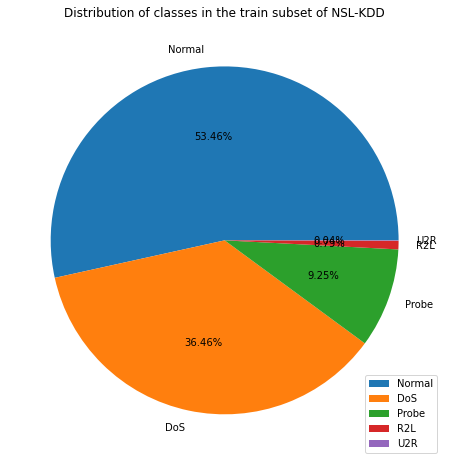

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(train_Y_new.label.value_counts(), labels=['Normal','DoS','Probe','R2L','U2R'], autopct='%0.2f%%')
plt.title("Distribution of classes in the train subset of NSL-KDD")
plt.legend()
plt.show()

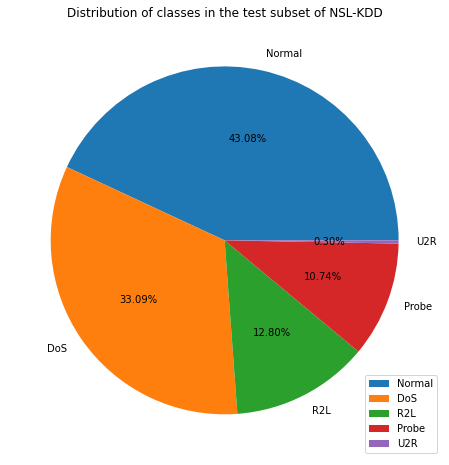

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(test_Y_new.label.value_counts(), labels=['Normal','DoS','R2L','Probe','U2R'], autopct='%0.2f%%')
plt.title("Distribution of classes in the test subset of NSL-KDD")
plt.legend()
plt.show()

In [55]:
#now we train it: 1st experiment (all features, original datasets, multiclass)
from tensorflow.python.keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import PReLU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
act1 = PReLU(alpha_initializer='zeros', weights=None)
model1 = Sequential()
# define the NN architecture and activation function

model1.add(Dense(496, input_dim=123, activation=Activation(act1)))
model1.add(Dropout(0.1))
model1.add(Dense(248, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(124, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(62, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(5))
model1.add(Activation('softmax'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model1.fit(train_X, train_Y_new, validation_data=(test_X, test_Y_new), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1969/1969 [==============================] - 7s 3ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 1.4407 - val_accuracy: 0.7474
Epoch 2/100
1969/1969 [==============================] - 7s 3ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 1.7836 - val_accuracy: 0.7205
Epoch 3/100
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 1.8545 - val_accuracy: 0.7203
Epoch 4/100
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 1.6677 - val_accuracy: 0.7558
Epoch 5/100
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0108 - accuracy: 0.9962 - val_loss: 1.8353 - val_accuracy: 0.7484
Epoch 6/100
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 2.1560 - val_accuracy: 0.7487
Epoch 7/100
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 2.1969 - val_ac

In [57]:
test_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_harvest,service_aol,service_http_8001,service_urh_i,service_http_2784,service_red_i
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,0.00,1.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,0.00,1.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.00,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [58]:
#training accuracy
train_acc1 = model1.evaluate(train_X, train_Y_new, verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[1], train_acc1[1]*100))

accuracy: 99.82%


In [60]:
#calculate the test accuracy using evaluate function
test_acc1 = model1.evaluate(test_X, test_Y_new, verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[1], test_acc1[1] * 100))

accuracy: 74.99%


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
y_pred1 = model1.predict_classes(test_X)
pred_accuracy1 = accuracy_score(test_Y_new, y_pred1)
pred_accuracy1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.7498669268985095

In [66]:
# Precision
precision1 = precision_score(test_Y_new, y_pred1, average='weighted')
print('Precision : %f'% precision1)

Precision : 0.746829


In [67]:
recall1 = recall_score(test_Y_new, y_pred1,average='weighted')
print('Recall: %f' % recall1)

Recall: 0.749867


In [68]:
# f1-score
f1_1 = f1_score(test_Y_new, y_pred1, average='weighted')
print('F1 score: %f' % f1_1)

F1 score: 0.708949


In [69]:
from sklearn.metrics import confusion_matrix
# confusion matrix
confusionmatrix1 = confusion_matrix(test_Y_new, y_pred1)
print(confusionmatrix1)

[[5836  223   71    0 1330]
 [ 266 1835    1    0  319]
 [ 105  289  148    2 2341]
 [   2   25   22    8   10]
 [ 387  243    3    0 9078]]


In [70]:
from sklearn.metrics import classification_report
target_names=['DoS','Probe','R2L','U2R','Normal']
print(classification_report(test_Y_new, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

         DoS       0.88      0.78      0.83      7460
       Probe       0.70      0.76      0.73      2421
         R2L       0.60      0.05      0.09      2885
         U2R       0.80      0.12      0.21        67
      Normal       0.69      0.93      0.80      9711

    accuracy                           0.75     22544
   macro avg       0.74      0.53      0.53     22544
weighted avg       0.75      0.75      0.71     22544



In [78]:
# ROC AUC CHECK IF THIS IS CORRECT
roc1 = roc_auc_score(test_Y_new, model1.predict(test_X), average='weighted', multi_class='ovr')
print('ROC AUC score: %f' % roc1)

ROC AUC score: 0.935483


In [79]:
pred=model1.predict(test_X)
pred

array([[9.99999881e-01, 2.86950397e-09, 5.28481658e-09, 7.82677811e-10,
        8.85488163e-08],
       [9.99999881e-01, 1.74453110e-08, 1.26145405e-08, 2.45127296e-09,
        1.74309505e-07],
       [2.65855404e-09, 7.17941404e-08, 2.83969044e-08, 7.30214289e-09,
        9.99999881e-01],
       ...,
       [1.82475542e-05, 1.11019472e-06, 5.40594810e-05, 4.32200159e-06,
        9.99922276e-01],
       [8.47982014e-12, 3.39364902e-13, 1.45928202e-12, 3.02732232e-13,
        1.00000000e+00],
       [2.72790385e-06, 9.99783814e-01, 3.81112528e-07, 8.03398962e-06,
        2.05061122e-04]], dtype=float32)

In [80]:
y_pred1

array([0, 0, 4, ..., 4, 4, 1], dtype=int64)

In [82]:
# experiment no.2
#using all of the features, but shuffle dataset and different split
ds_train_concat=pd.concat([train_X,train_Y_new],axis=1)
ds_test_concat=pd.concat([test_X,test_Y_new],axis=1)

In [83]:
ds_train_concat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [84]:
ds_test_concat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_harvest,service_aol,service_http_8001,service_urh_i,service_http_2784,service_red_i,label
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,0.00,1.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,0.00,1.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.00,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [85]:
ds_concat=pd.concat([ds_train_concat,ds_test_concat],axis=0)
ds_concat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [86]:
from pycaret.classification import *
dsp_tr=setup(data = ds_concat,
             target = 'label',train_size=0.8,
             silent = True, fold_shuffle=True,preprocess=False)

,Description,Value
0,session_id,456
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4"
4,Original Data,"(148517, 124)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,89
8,Transformed Train Set,"(118813, 123)"
9,Transformed Test Set,"(29704, 123)"


In [87]:
X_train2=get_config('X_train')
Y_train2 = get_config('y_train')
Y_test2 = get_config('y_test')
X_test2 = get_config('X_test')

In [88]:
X_train2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
6950,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100618,0.000000,7.478457e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113301,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80345,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18398,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77647,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32622,0.000000,1.543519e-07,0.000007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15834,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55338,0.000047,1.590345e-03,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
X_test2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
2489,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
112687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12684,0.0,1.456560e-07,4.320817e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91555,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24036,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111426,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103339,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79150,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
Y_train2

6950      0
100618    0
113301    1
80345     0
18398     0
         ..
77647     0
32622     4
15834     0
55338     4
66149     0
Name: label, Length: 118813, dtype: int32

In [91]:
Y_test2

2489      0
112687    0
12684     4
91555     0
24036     0
         ..
42225     0
111426    0
103339    0
79150     0
95573     4
Name: label, Length: 29704, dtype: int64

In [93]:
X_train2 = np.asarray(X_train2).astype(np.float32)
Y_train2 = np.asarray(Y_train2).astype(np.float32)
X_train2

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.4784566e-07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.6611356e-05, 1.5903453e-03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [94]:
X_test2 = np.asarray(X_test2).astype(np.float32)
Y_test2 = np.asarray(Y_test2).astype(np.float32)

In [95]:
act2 = PReLU(alpha_initializer='zeros', weights=None)
model2 = Sequential()
# define the NN architecture and activation function

model2.add(Dense(496, input_dim=123, activation=Activation(act2)))
model2.add(Dropout(0.1))
model2.add(Dense(248, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(124, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(62, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(5))
model2.add(Activation('softmax'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model2.fit(X_train2, Y_train2, validation_data=(X_test2, Y_test2), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9670 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 2/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0274 - val_accuracy: 0.9904
Epoch 3/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0245 - val_accuracy: 0.9914
Epoch 4/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0224 - val_accuracy: 0.9923
Epoch 5/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0144 - val_accuracy: 0.9949
Epoch 6/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0139 - val_accuracy: 0.9955
Epoch 7/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0119 - val_ac

In [96]:
#training accuracy
train_acc2 = model2.evaluate(X_train2, Y_train2, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], train_acc2[1]*100))

accuracy: 99.82%


In [97]:
#calculate the test accuracy using evaluate function
test_acc2 = model2.evaluate(X_test2, Y_test2, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], test_acc2[1] * 100))

accuracy: 99.74%


In [98]:
y_pred2 = model2.predict_classes(X_test2)
pred_accuracy2 = accuracy_score(Y_test2, y_pred2)
pred_accuracy2

0.9974077565311069

In [99]:
# Precision
precision2 = precision_score(Y_test2, y_pred2, average='weighted')
print('Precision : %f' % precision2)

Precision : 0.997405


In [100]:
#recall
recall2 = recall_score(Y_test2, y_pred2, average='weighted')
print('Recall: %f' % recall2)

Recall: 0.997408


In [101]:
# f1-score
f1_2 = f1_score(Y_test2, y_pred2, average='weighted')
print('F1 score: %f' % f1_2)

F1 score: 0.997399


In [102]:
# confusion matrix
confusionmatrix2 = confusion_matrix(Y_test2, y_pred2)
print(confusionmatrix2)

[[10666     2     1     0     7]
 [    4  2806     1     0     9]
 [    0     2   706     5     6]
 [    0     1     5    12     2]
 [    3     4    25     0 15437]]


In [103]:
target_names=['DoS','Probe','R2L','U2R','Normal']
print(classification_report(Y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10676
       Probe       1.00      1.00      1.00      2820
         R2L       0.96      0.98      0.97       719
         U2R       0.71      0.60      0.65        20
      Normal       1.00      1.00      1.00     15469

    accuracy                           1.00     29704
   macro avg       0.93      0.91      0.92     29704
weighted avg       1.00      1.00      1.00     29704



In [130]:
roc2 = roc_auc_score(Y_test2, model2.predict(X_test2), average='weighted', multi_class='ovr')
print('ROC AUC score: %f' % roc2)

ROC AUC score: 0.999985


In [110]:
#third experiment, on this dataset do feature extraction
#prvo uzmem ove opet da bih spojila
X_train3=get_config('X_train')
Y_train3 = get_config('y_train')
Y_test3 = get_config('y_test')
X_test3 = get_config('X_test')

In [111]:
X_train3

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
6950,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100618,0.000000,7.478457e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113301,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80345,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18398,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77647,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32622,0.000000,1.543519e-07,0.000007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15834,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55338,0.000047,1.590345e-03,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
Y_train3

6950      0
100618    0
113301    1
80345     0
18398     0
         ..
77647     0
32622     4
15834     0
55338     4
66149     0
Name: label, Length: 118813, dtype: int32

In [113]:
#sada da spojimo
ds_train_concat_new=pd.concat([X_train3,Y_train3],axis=1)
ds_train_concat_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
6950,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
100618,0.000000,7.478457e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
113301,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80345,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
18398,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77647,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32622,0.000000,1.543519e-07,0.000007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
15834,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
55338,0.000047,1.590345e-03,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [114]:
ds_test_concat_new=pd.concat([X_test3,Y_test3],axis=1)
ds_test_concat_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
2489,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
112687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
12684,0.0,1.456560e-07,4.320817e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
91555,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
24036,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
111426,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
103339,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
79150,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [115]:
ds_concat_new=pd.concat([ds_train_concat_new,ds_test_concat_new],axis=0)
ds_concat_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
6950,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
100618,0.0,7.478457e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
113301,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80345,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
18398,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
111426,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
103339,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
79150,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [117]:
dsp_tr_new=setup(data = ds_concat_new,
             target = 'label',train_size=0.8,
             silent = True, fold_shuffle=False,feature_selection=True, feature_selection_threshold=0.2, data_split_shuffle=False)

,Description,Value
0,session_id,3296
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4"
4,Original Data,"(148517, 124)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,89
8,Ordinal Features,False
9,High Cardinality Features,False


In [118]:
X_train4=get_config('X_train')
Y_train4 = get_config('y_train')
Y_test4 = get_config('y_test')
X_test4 = get_config('X_test')

In [119]:
X_train4

,root_shell_0.0,logged_in_0.0,serror_rate,src_bytes,service_ftp_data_0.0,wrong_fragment,dst_bytes,dst_host_srv_rerror_rate,rerror_rate,dst_host_same_src_port_rate,...,srv_serror_rate,hot,dst_host_diff_srv_rate,dst_host_count,dst_host_rerror_rate,flag_SF_1.0,dst_host_serror_rate,service_pop_3_1.0,service_ecr_i_0.0,service_http_0.0
6950,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000,0.00,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.00,0.0,1.0,0.0,1.0,1.0
100618,1.0,1.0,0.0,7.478457e-07,1.0,0.0,0.000000,0.00,0.0,1.00,...,0.0,0.0,0.00,1.000000,0.00,1.0,0.0,0.0,0.0,1.0
113301,1.0,1.0,0.0,0.000000e+00,1.0,0.0,0.000000,1.00,1.0,0.03,...,0.0,0.0,1.00,0.117647,0.97,0.0,0.0,0.0,1.0,1.0
80345,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000,0.00,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.00,0.0,1.0,0.0,1.0,1.0
18398,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000,0.00,0.0,0.00,...,1.0,0.0,0.08,1.000000,0.00,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77647,1.0,1.0,0.0,0.000000e+00,1.0,0.0,0.000000,1.00,1.0,0.00,...,0.0,0.0,0.08,1.000000,1.00,0.0,0.0,0.0,1.0,1.0
32622,1.0,0.0,0.0,1.543519e-07,1.0,0.0,0.000007,0.03,0.0,0.00,...,0.0,0.0,0.00,0.870588,0.03,1.0,0.0,0.0,1.0,0.0
15834,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000,0.00,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.00,0.0,1.0,0.0,1.0,1.0
55338,1.0,0.0,0.0,1.590345e-03,0.0,0.0,0.000000,0.01,0.0,0.39,...,0.0,0.0,0.39,0.709804,0.36,1.0,0.0,0.0,1.0,1.0


In [120]:
X_test4

,root_shell_0.0,logged_in_0.0,serror_rate,src_bytes,service_ftp_data_0.0,wrong_fragment,dst_bytes,dst_host_srv_rerror_rate,rerror_rate,dst_host_same_src_port_rate,...,srv_serror_rate,hot,dst_host_diff_srv_rate,dst_host_count,dst_host_rerror_rate,flag_SF_1.0,dst_host_serror_rate,service_pop_3_1.0,service_ecr_i_0.0,service_http_0.0
2489,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.0,0.0,1.00,0.0,1.0,1.0
112687,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.01,...,1.0,0.0,0.09,0.431373,0.0,0.0,0.98,0.0,1.0,1.0
12684,1.0,0.0,0.0,1.456560e-07,1.0,0.0,4.320817e-07,0.0,0.0,0.03,...,0.0,0.0,0.00,0.121569,0.0,1.0,0.00,0.0,1.0,0.0
91555,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.0,0.0,1.00,0.0,1.0,1.0
24036,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.06,...,1.0,0.0,0.06,0.188235,0.0,0.0,0.96,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.00,...,1.0,0.0,0.08,1.000000,0.0,0.0,1.00,0.0,1.0,1.0
111426,1.0,1.0,1.0,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.0,0.00,...,1.0,0.0,0.06,1.000000,0.0,0.0,1.00,0.0,1.0,1.0
103339,1.0,1.0,0.0,0.000000e+00,1.0,0.0,0.000000e+00,1.0,1.0,0.00,...,0.0,0.0,0.07,1.000000,1.0,0.0,0.00,0.0,1.0,1.0
79150,1.0,1.0,0.0,0.000000e+00,1.0,0.0,0.000000e+00,1.0,1.0,0.00,...,0.0,0.0,0.08,1.000000,1.0,0.0,0.00,0.0,1.0,1.0


In [121]:
act3 = PReLU(alpha_initializer='zeros', weights=None)
model3 = Sequential()
# define the NN architecture and activation function

model3.add(Dense(496, input_dim=35, activation=Activation(act3)))
model3.add(Dropout(0.1))
model3.add(Dense(248, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(124, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(62, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(5))
model3.add(Activation('softmax'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model3.fit(X_train4, Y_train4, validation_data=(X_test4, Y_test4), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.1259 - accuracy: 0.9595 - val_loss: 0.0494 - val_accuracy: 0.9841
Epoch 2/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 3/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9864
Epoch 4/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0294 - val_accuracy: 0.9901
Epoch 5/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0269 - val_accuracy: 0.9910
Epoch 6/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0268 - val_accuracy: 0.9899
Epoch 7/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.0221 - val_ac

In [122]:
#training accuracy
train_acc3 = model3.evaluate(X_train4, Y_train4, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], train_acc3[1] * 100))

accuracy: 99.59%


In [123]:
#calculate the test accuracy using evaluate function
test_acc3 = model3.evaluate(X_test4, Y_test4, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], test_acc3[1] * 100))

accuracy: 99.49%


In [124]:
y_pred3 = model3.predict_classes(X_test4)
pred_accuracy3 = accuracy_score(Y_test4, y_pred3)
pred_accuracy3

0.9949165095610019

In [125]:
# Precision
precision3 = precision_score(Y_test4, y_pred3, average='weighted')
print('Precision : %f' % precision3)

Precision : 0.995073


In [126]:
#recall
recall3 = recall_score(Y_test4, y_pred3, average='weighted')
print('Recall: %f' % recall3)

Recall: 0.994917


In [127]:
# f1-score
f1_3 = f1_score(Y_test4, y_pred3, average='weighted')
print('F1 score: %f' % f1_3)

F1 score: 0.994925


In [128]:
# confusion matrix
confusionmatrix3 = confusion_matrix(Y_test4, y_pred3)
print(confusionmatrix3)

[[10666     3     1     0     6]
 [    1  2803     8     1     7]
 [    1    10   702     2     4]
 [    0     0     9     9     2]
 [    8    26    62     0 15373]]


In [129]:
target_names = ['DoS', 'Probe', 'R2L', 'U2R', 'Normal']
print(classification_report(Y_test4, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10676
       Probe       0.99      0.99      0.99      2820
         R2L       0.90      0.98      0.94       719
         U2R       0.75      0.45      0.56        20
      Normal       1.00      0.99      1.00     15469

    accuracy                           0.99     29704
   macro avg       0.93      0.88      0.90     29704
weighted avg       1.00      0.99      0.99     29704



In [131]:
roc3 = roc_auc_score(Y_test4, model3.predict(X_test4), average='weighted', multi_class='ovr')
print('ROC AUC score: %f' % roc3)

ROC AUC score: 0.999949


In [139]:
from sklearn.utils import compute_class_weight

#fourth experiment, we use same stuff, just add class weights
weights_multi=compute_class_weight('balanced', [0,1,2,3,4], Y_train4)
weights_multi

array([  0.55635785,   2.11091765,   7.51743119, 240.02626263,
         0.38585045])

In [140]:
act4 = PReLU(alpha_initializer='zeros', weights=None)
model4 = Sequential()
# define the NN architecture and activation function

model4.add(Dense(496, input_dim=35, activation=Activation(act4)))
model4.add(Dropout(0.1))
model4.add(Dense(248, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(124, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(62, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(5))
model4.add(Activation('softmax'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model4.fit(X_train4, Y_train4, validation_data=(X_test4, Y_test4), epochs=100, batch_size=64, callbacks=[es], class_weight={0:0.556163,1:2.115239,2:7.720143,3:25.132632,4:0.385256})

Epoch 1/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.2228 - accuracy: 0.9320 - val_loss: 0.0761 - val_accuracy: 0.9788
Epoch 2/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.1264 - accuracy: 0.9652 - val_loss: 0.0999 - val_accuracy: 0.9683
Epoch 3/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9718 - val_loss: 0.3465 - val_accuracy: 0.9076
Epoch 4/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0964 - accuracy: 0.9743 - val_loss: 0.0685 - val_accuracy: 0.9799
Epoch 5/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.0613 - val_accuracy: 0.9800
Epoch 6/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9787 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 7/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0773 - accuracy: 0.9803 - val_loss: 0.0511 - val_ac

In [141]:
y_pred4 = model4.predict_classes(X_test4)
pred_accuracy4 = accuracy_score(Y_test4, y_pred4)
pred_accuracy4

0.9883854026393751

In [142]:
# confusion matrix
confusionmatrix4 = confusion_matrix(Y_test4, y_pred4)
print(confusionmatrix4)

[[10603    52    16     0     5]
 [    1  2789    23     5     2]
 [    0     3   708     7     1]
 [    0     0     6    14     0]
 [   28    63   116    17 15245]]


In [143]:
target_names = ['DoS', 'Probe', 'R2L', 'U2R', 'Normal']
print(classification_report(Y_test4, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

         DoS       1.00      0.99      1.00     10676
       Probe       0.96      0.99      0.97      2820
         R2L       0.81      0.98      0.89       719
         U2R       0.33      0.70      0.44        20
      Normal       1.00      0.99      0.99     15469

    accuracy                           0.99     29704
   macro avg       0.82      0.93      0.86     29704
weighted avg       0.99      0.99      0.99     29704



In [144]:
#training accuracy
train_acc4 = model4.evaluate(X_train4, Y_train4, verbose=0)
print("%s: %.2f%%" % (model4.metrics_names[1], train_acc4[1] * 100))

accuracy: 98.93%


In [145]:
#calculate the test accuracy using evaluate function
test_acc4 = model4.evaluate(X_test4, Y_test4, verbose=0)
print("%s: %.2f%%" % (model4.metrics_names[1], test_acc4[1] * 100))

accuracy: 98.84%


In [146]:
# Precision
precision4 = precision_score(Y_test4, y_pred4, average='weighted')
print('Precision : %f' % precision4)

Precision : 0.989954


In [147]:
#recall
recall4 = recall_score(Y_test4, y_pred4, average='weighted')
print('Recall: %f' % recall4)

Recall: 0.988385


In [148]:
# f1-score
f1_4 = f1_score(Y_test4, y_pred4, average='weighted')
print('F1 score: %f' % f1_4)

F1 score: 0.988881


In [149]:
roc4 = roc_auc_score(Y_test4, model4.predict(X_test4), average='weighted', multi_class='ovr')
print('ROC AUC score: %f' % roc4)

ROC AUC score: 0.999738


In [150]:
act5 = PReLU(alpha_initializer='zeros', weights=None)
model5 = Sequential()
# define the NN architecture and activation function

model5.add(Dense(496, input_dim=35, activation=Activation(act5)))
model5.add(Dropout(0.1))
model5.add(Dense(248, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(124, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(62, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(5))
model5.add(Activation('softmax'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model5.fit(X_train4, Y_train4, validation_data=(X_test4, Y_test4), epochs=100, batch_size=64, callbacks=[es], class_weight={0:0.55,1:2.11,2:7.51,3:24.03,4:0.38})

Epoch 1/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.2196 - accuracy: 0.9339 - val_loss: 0.1223 - val_accuracy: 0.9636
Epoch 2/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.1283 - accuracy: 0.9661 - val_loss: 0.0859 - val_accuracy: 0.9709
Epoch 3/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.1042 - accuracy: 0.9718 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 4/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0958 - accuracy: 0.9744 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 5/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9769 - val_loss: 0.0511 - val_accuracy: 0.9844
Epoch 6/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9788 - val_loss: 0.0487 - val_accuracy: 0.9862
Epoch 7/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9780 - val_loss: 0.0657 - val_ac

In [151]:
y_pred5 = model5.predict_classes(X_test4)
# confusion matrix
confusionmatrix5 = confusion_matrix(Y_test4, y_pred5)
print(confusionmatrix5)

[[10629    19    23     0     5]
 [    1  2799    13     6     1]
 [    0     5   706     7     1]
 [    0     0     6    14     0]
 [   27    76    88     0 15278]]


In [152]:
target_names = ['DoS', 'Probe', 'R2L', 'U2R', 'Normal']
print(classification_report(Y_test4, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10676
       Probe       0.97      0.99      0.98      2820
         R2L       0.84      0.98      0.91       719
         U2R       0.52      0.70      0.60        20
      Normal       1.00      0.99      0.99     15469

    accuracy                           0.99     29704
   macro avg       0.87      0.93      0.89     29704
weighted avg       0.99      0.99      0.99     29704



In [153]:
#training accuracy
train_acc5 = model5.evaluate(X_train4, Y_train4, verbose=0)
print("%s: %.2f%%" % (model5.metrics_names[1], train_acc5[1] * 100))

accuracy: 99.09%


In [154]:
#calculate the test accuracy using evaluate function
test_acc5 = model5.evaluate(X_test4, Y_test4, verbose=0)
print("%s: %.2f%%" % (model5.metrics_names[1], test_acc5[1] * 100))

accuracy: 99.06%


In [155]:
# Precision
precision5= precision_score(Y_test4, y_pred5, average='weighted')
print('Precision : %f' % precision5)
#recall
recall5 = recall_score(Y_test4, y_pred5, average='weighted')
print('Recall: %f' % recall5)
# f1-score
f1_5 = f1_score(Y_test4, y_pred5, average='weighted')
print('F1 score: %f' % f1_5)
roc5 = roc_auc_score(Y_test4, model5.predict(X_test4), average='weighted', multi_class='ovr')
print('ROC AUC score: %f' % roc5)

Precision : 0.991454
Recall: 0.990641
F1 score: 0.990877
ROC AUC score: 0.999791


In [164]:
#FNR=0.049%

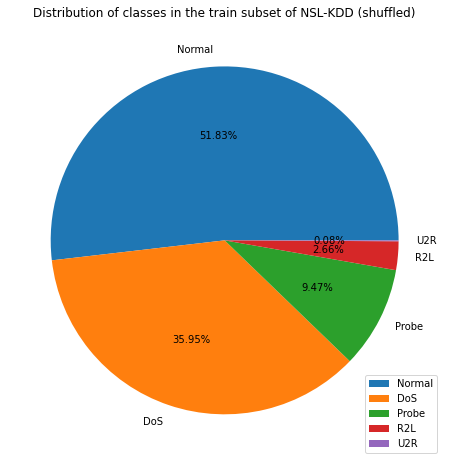

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(pd.value_counts(Y_train4), labels=['Normal','DoS','Probe','R2L','U2R'], autopct='%0.2f%%')
plt.title("Distribution of classes in the train subset of NSL-KDD (shuffled)")
plt.legend()
plt.show()

In [170]:
pd.value_counts(Y_train4)

4    61585
0    42711
1    11257
2     3161
3       99
Name: label, dtype: int64

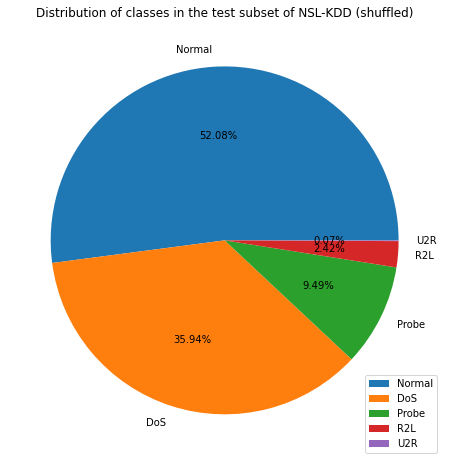

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(pd.value_counts(Y_test4), labels=['Normal','DoS','Probe','R2L','U2R'], autopct='%0.2f%%')
plt.title("Distribution of classes in the test subset of NSL-KDD (shuffled)")
plt.legend()
plt.show()

In [172]:
pd.value_counts(Y_test4)

4    15469
0    10676
1     2820
2      719
3       20
Name: label, dtype: int64

In [175]:
X_train4.columns

Index(['root_shell_0.0', 'logged_in_0.0', 'serror_rate', 'src_bytes',
       'service_ftp_data_0.0', 'wrong_fragment', 'dst_bytes',
       'dst_host_srv_rerror_rate', 'rerror_rate',
       'dst_host_same_src_port_rate', 'srv_count', 'flag_S0_0.0',
       'same_srv_rate', 'duration', 'num_root', 'diff_srv_rate',
       'num_file_creations', 'dst_host_srv_serror_rate',
       'dst_host_srv_diff_host_rate', 'protocol_type_icmp_1.0',
       'dst_host_srv_count', 'count', 'service_eco_i_0.0',
       'dst_host_same_srv_rate', 'difficulty_level', 'srv_serror_rate', 'hot',
       'dst_host_diff_srv_rate', 'dst_host_count', 'dst_host_rerror_rate',
       'flag_SF_1.0', 'dst_host_serror_rate', 'service_pop_3_1.0',
       'service_ecr_i_0.0', 'service_http_0.0'],
      dtype='object')

In [ ]:
#here are all the experiments for multiclass, they are complete